In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
from matplotlib import animation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from wand.image import Image
from wand.display import display

In [3]:
ncep_hrrr = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')

In [4]:
ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

<type 'netCDF4._netCDF4.Variable'>
float32 Planetary_boundary_layer_height_surface(reftime, time1, y, x)
    long_name: Planetary boundary layer height @ Ground or water surface
    units: m
    abbreviation: HPBL
    missing_value: nan
    grid_mapping: LambertConformal_Projection
    coordinates: reftime time1 y x 
    Grib_Variable_Id: VAR_0-3-18_L1
    Grib2_Parameter: [ 0  3 18]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Mass
    Grib2_Parameter_Name: Planetary boundary layer height
    Grib2_Level_Type: Ground or water surface
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (86, 16, 1377, 2145)
filling off

In [5]:
ncep_hrrr.variables['Planetary_boundary_layer_height_surface'].dimensions

(u'reftime', u'time1', u'y', u'x')

In [6]:
print ncep_hrrr.variables['Planetary_boundary_layer_height_surface'].dimensions[3]

x


In [7]:
print ncep_hrrr.variables['x'].units

km


In [4]:
#np.meshgrid returns coordinate matrices from coordinate vectors
#xg1, yg1 = np.meshgrid(ncep_hrrr.variables['x'][:]*1000.0, ncep_hrrr.variables['y'][:]*1000.0)

In [9]:
var = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

In [38]:
def lat_lons(open_dap_dataset, proj_key = 'LambertConformal_Projection'):
    xg, yg = np.meshgrid(open_dap_dataset.variables['x'][:]*1000.0, open_dap_dataset.variables['y'][:]*1000.0)
    pnyc = pyproj.Proj(proj = 'lcc', 
                       lat_1 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_2 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_0 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lon_0 = open_dap_dataset.variables[proj_key].longitude_of_central_meridian )
    return pnyc(xg, yg, inverse = True)

In [39]:
lon, lat = lat_lons(ncep_hrrr)

In [9]:
print lon.shape, lat.shape

(1377, 2145) (1377, 2145)


In [12]:
print lon, lat

[[-121.51133032 -121.48757865 -121.46382768 ...,  -69.29750576
   -69.27370274  -69.24989899]
 [-121.51603565 -121.49227998 -121.46852501 ...,  -69.29293692
   -69.26912988  -69.2453221 ]
 [-121.52074262 -121.49698296 -121.47322399 ...,  -69.28836648
   -69.26455541  -69.2407436 ]
 ..., 
 [-130.01329984 -129.98252831 -129.95175612 ...,  -61.03545684
   -61.00456796  -60.97367965]
 [-130.02142901 -129.99065098 -129.95987229 ...,  -61.02755007
   -60.99665462  -60.96575973]
 [-130.02956267 -129.99877814 -129.96799295 ...,  -61.01963892
   -60.98873688  -60.95783541]] [[ 20.17598446  20.18042463  20.18486047 ...,  20.3248235   20.32051288
   20.31619791]
 [ 20.1984101   20.20285119  20.20728793 ...,  20.3472796   20.34296809
   20.33865224]
 [ 20.22083626  20.22527825  20.22971591 ...,  20.36973618  20.3654238
   20.36110707]
 ..., 
 [ 49.95200439  49.95724648  49.96248328 ...,  50.12763795  50.12255381
   50.1174644 ]
 [ 49.97185377  49.97709606  49.98233307 ...,  50.14749415  50.1424098

In [15]:
z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
print z.dimensions
print z.shape
print z.coordinates

(u'reftime', u'time', u'y', u'x')
(90, 16, 1377, 2145)
reftime time y x 


In [19]:
import numpy as np
z_min = -np.abs(z[0,1,:,:])
z_max = np.abs(z[0,1,:,:])

{-105.0: ([<matplotlib.lines.Line2D at 0x106063e90>],
  [<matplotlib.text.Text at 0x10bf75110>]),
 -100.0: ([<matplotlib.lines.Line2D at 0x10bf68610>],
  [<matplotlib.text.Text at 0x10bf75610>]),
 -95.0: ([<matplotlib.lines.Line2D at 0x10bf68bd0>],
  [<matplotlib.text.Text at 0x10bf75a50>])}

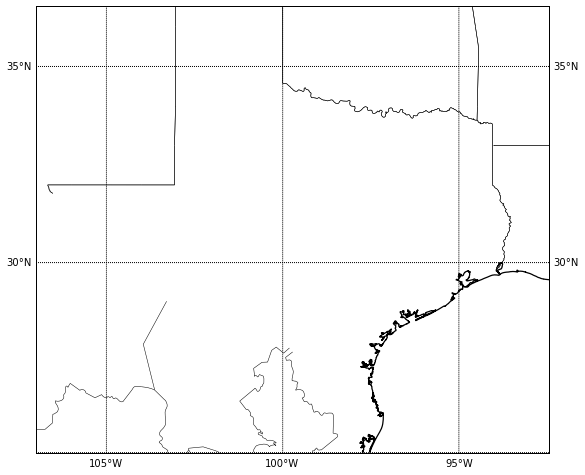

In [14]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
x, y = m(lon, lat)
m.drawstates()
m.drawcoastlines(linewidth = 1.25)
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 

<matplotlib.colorbar.Colorbar instance at 0x111f2b6c8>

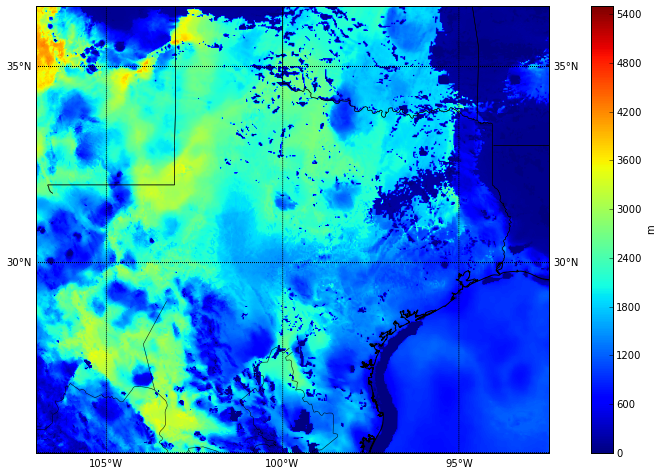

In [40]:
f = plt.figure(figsize = [15,8])
z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
m.pcolormesh(x, y, z[0,0,:,:], vmin = 0, vmax = 5500)
m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
m.drawstates()
m.drawcoastlines()
plt.colorbar(label='m')

<matplotlib.colorbar.Colorbar instance at 0x11ca07758>

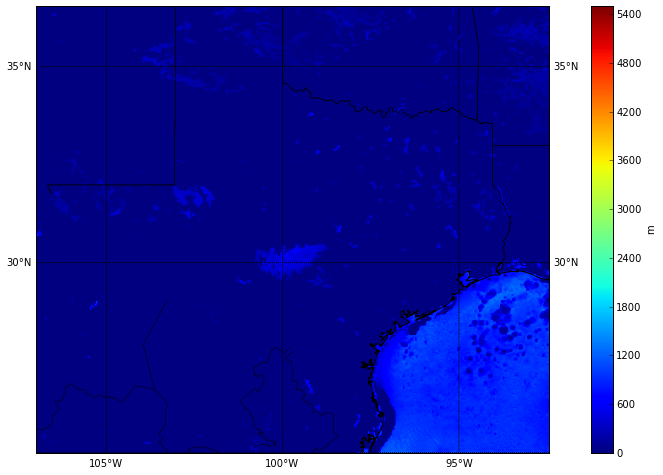

In [36]:
f = plt.figure(figsize = [15,8])
z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
m.pcolormesh(x, y, z[0,12,:,:], vmin = 0, vmax = 5500)
m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
m.drawstates()
m.drawcoastlines()
plt.colorbar(label='m')

In [28]:
var1 = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

In [34]:
a = var1

In [35]:
print a.dimensions
print a.shape[0]
print a.shape[1]

(u'reftime', u'time', u'y', u'x')
90
16


In [33]:
print i, j

90 16


IndexError: 

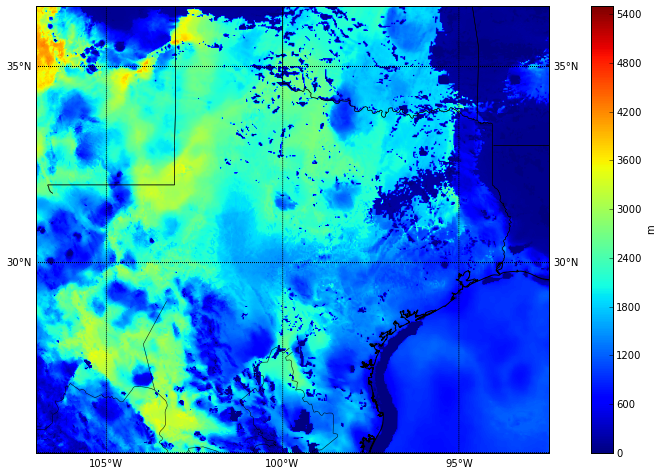

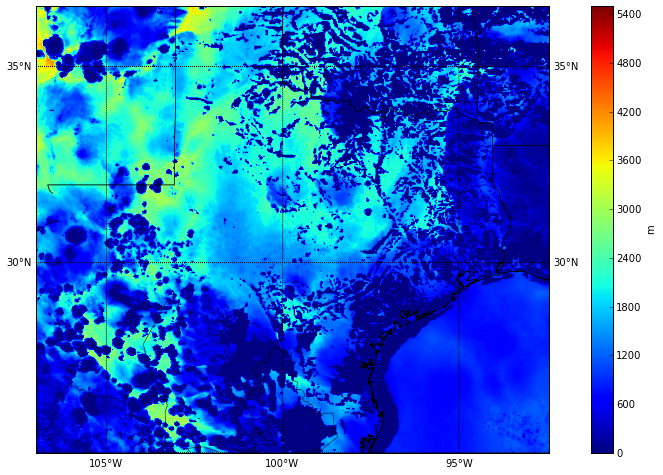

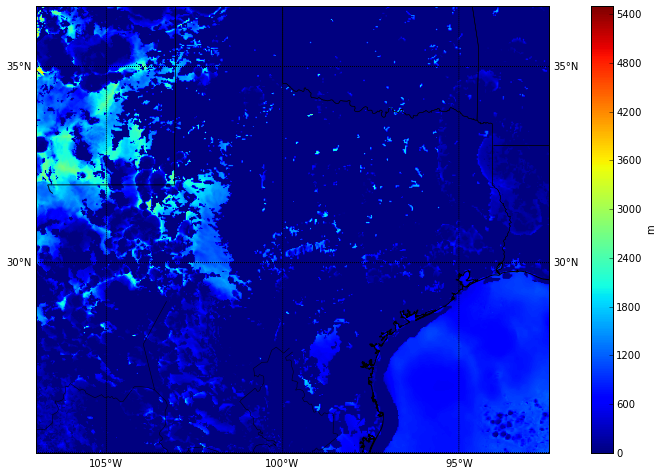

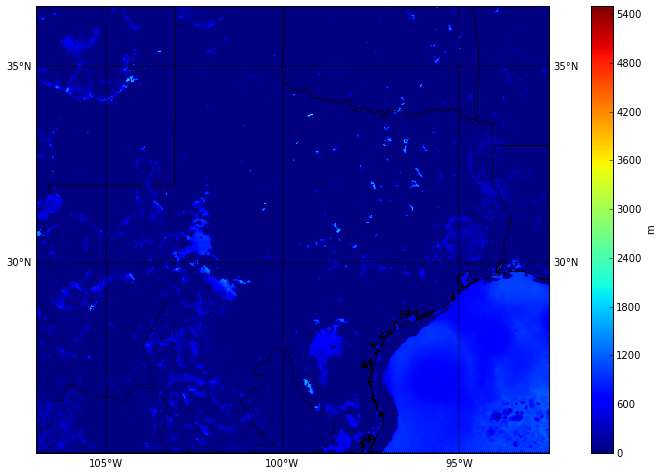

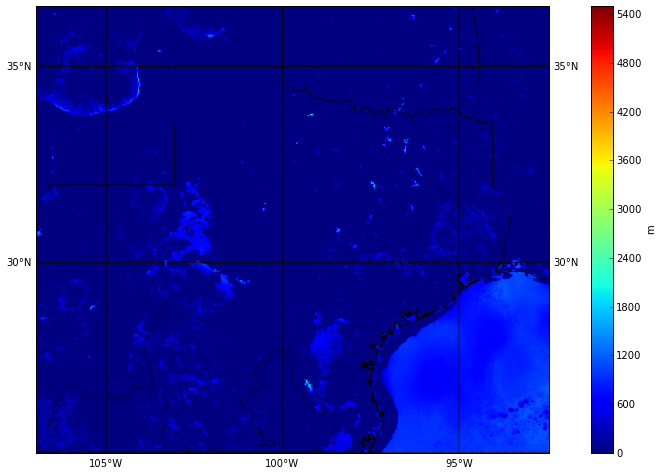

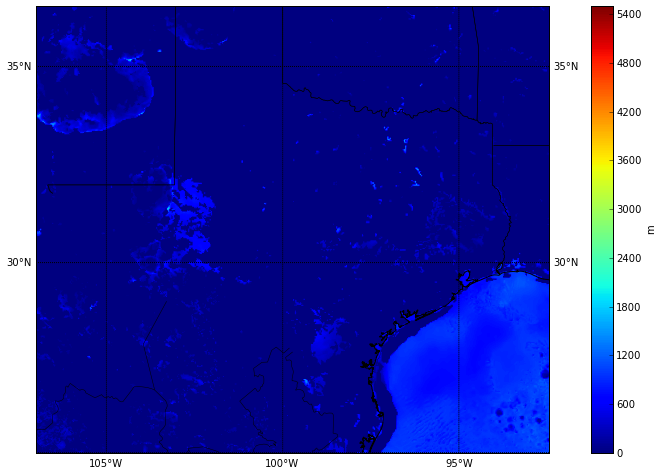

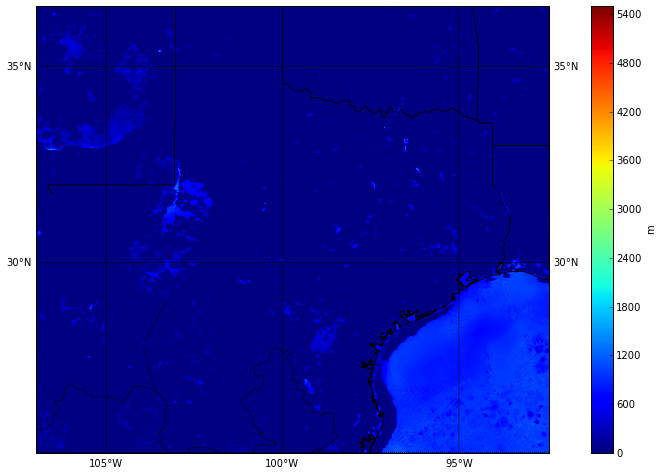

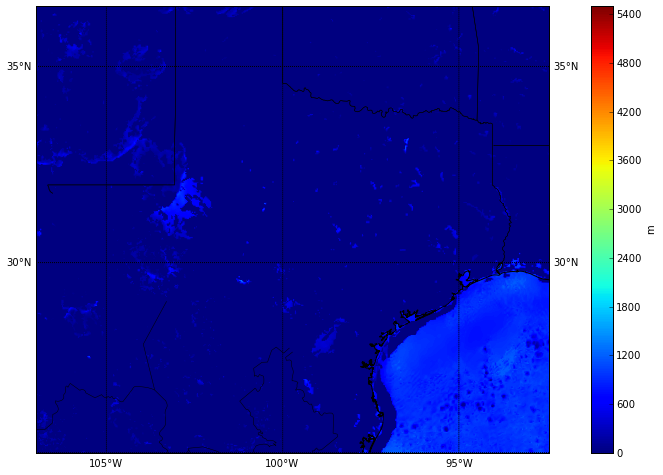

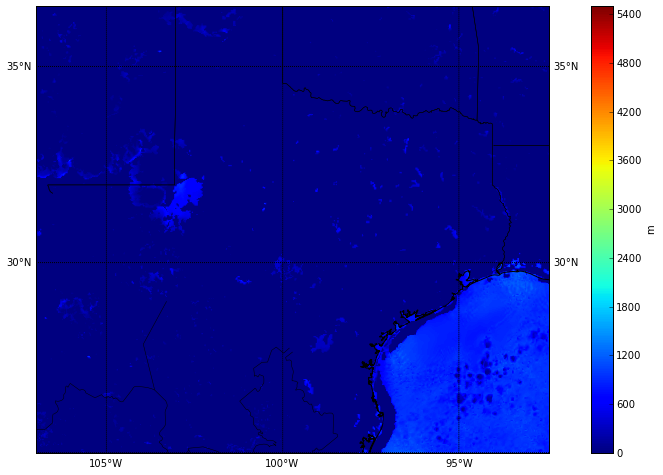

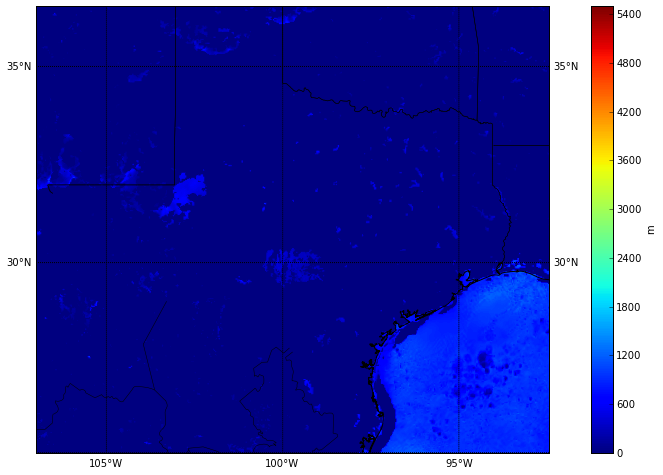

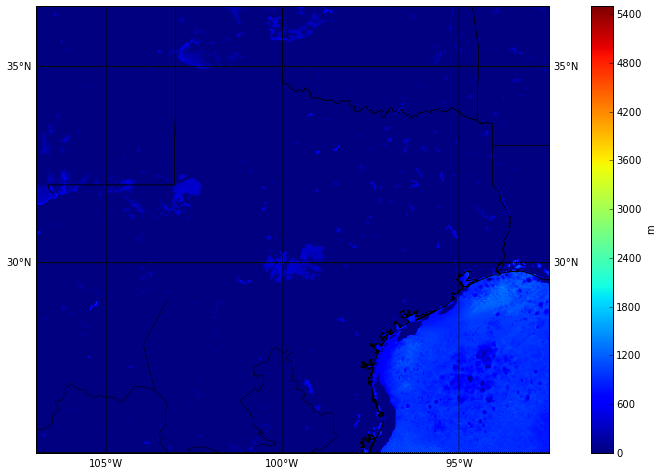

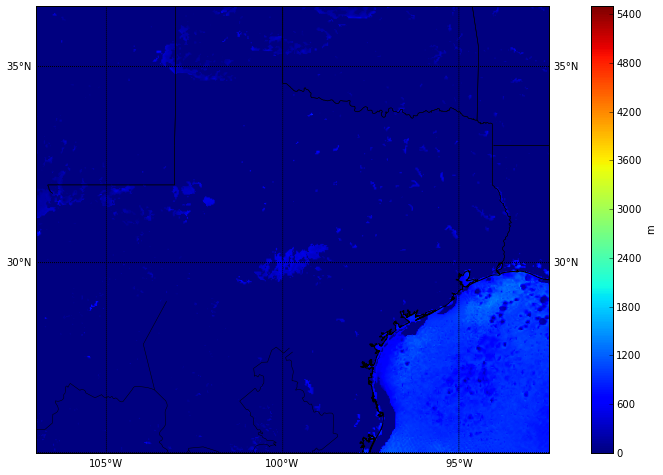

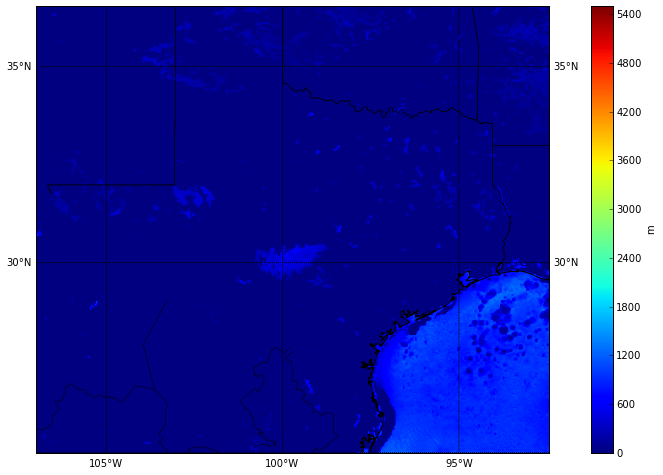

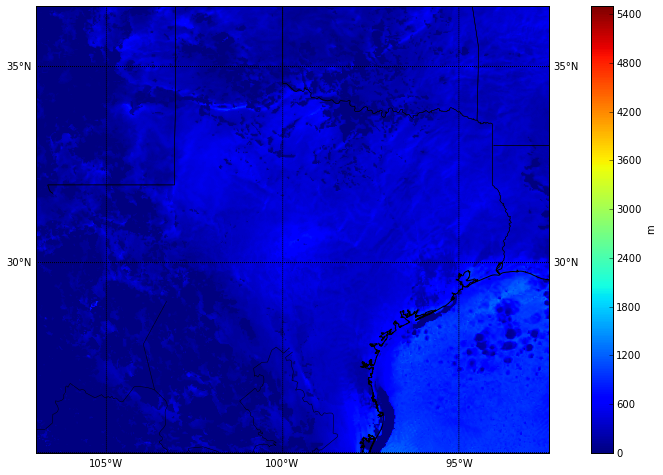

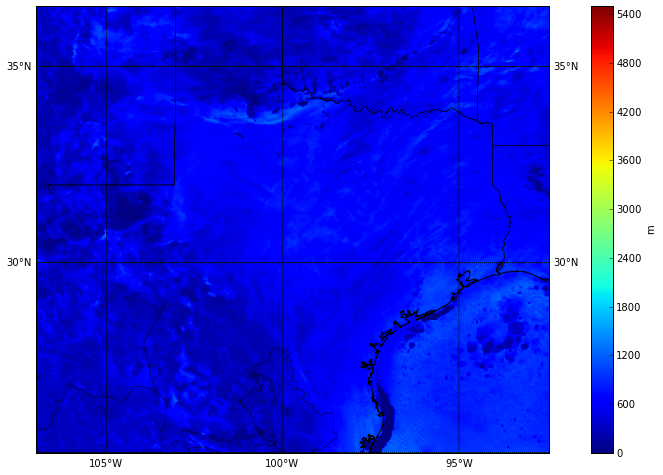

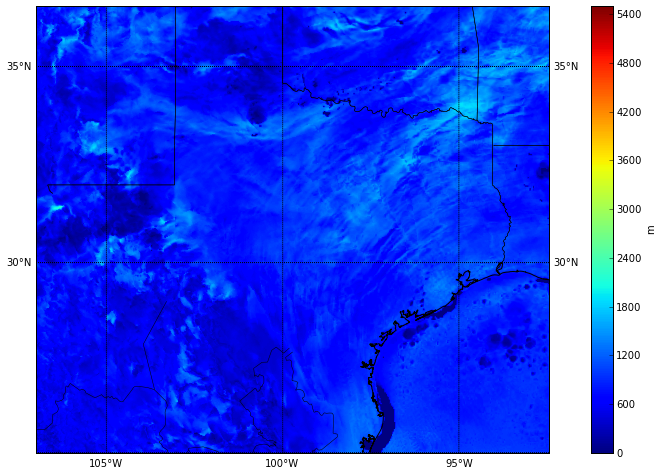

In [41]:
count = 0
count1 = 0
num = 0
i = a.shape[0]
j = a.shape[1]
while count < 2:
    while count1 <= j:
        f = plt.figure(figsize = [15,8])
        z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
        m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
                   urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
                   resolution='h')
        m.pcolormesh(x, y, z[count,count1,:,:], vmin = 0, vmax = 5500)
        m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
        m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
        m.drawstates()
        m.drawcoastlines()
        plt.colorbar(label='m')
        savefig('PBLH_%04d.png' %num)
        if count1 == j:
            count1 = 0
        else:
            count1 += 1
        num += 1
    count += 1